In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import mackey_glass_gen as mgg

In [2]:
#Activation functions
def f(x):
    return np.tanh(x)

def fOut(x):
    return f(x)

In [3]:
np.random.seed(1337)

In [4]:
def ESN():
    #Initialize the weights
    nNeurons = 1000
    nInputs = 1
    nOutputs = 1

    Win = np.random.normal(0, 1, (nNeurons, nInputs)) #Input weights
    Win = 0.2 * Win

    W = np.random.normal(0, 1, (nNeurons, nNeurons)) #Reservoir weights
    w, v = np.linalg.eig(W)
    W = 0.8 * W/np.max(np.absolute(w))

    Wback = np.random.normal(0, 1, (nNeurons, nOutputs))
    Wback = 0.2 * Wback

    #Reservoir
    X = np.zeros((nDataPoints, nNeurons))

    #Output
    Y = np.zeros(4000)
    Y[:3000] = y[:3000]


    for i in range(1, 3000):
        X[i] = f(Win + W.dot(X[i-1]).reshape(nNeurons, 1) + Wback.dot(Y[i])).reshape(nNeurons)
    Wout = np.linalg.pinv(X[999:2999]).dot(y[1000:3000]).reshape(nNeurons, 1)

    for i in range(3000, nDataPoints):
        X[i] = f(Win + W.dot(X[i-1]).reshape(nNeurons, 1) + Wback.dot(Y[i-1])).reshape(nNeurons)
        Y[i] = (Wout.reshape(1000, ).dot(X[i]))
    return Y[3000:]

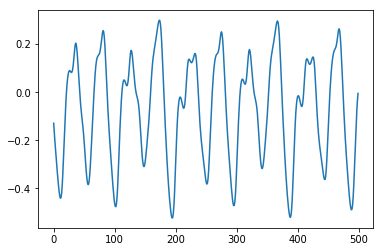

In [5]:
nDataPoints = 4000
length=4000 # duration of the series
tau=17 # delay in the equation

#Generate data
y = mgg.mackey_glass(tau, length)

#plot generated time-series
plt.plot(y[:500])
plt.show()

In [6]:
sum = np.zeros(1000)
#for i in range(10):
sum += ESN()
mean = sum#/10

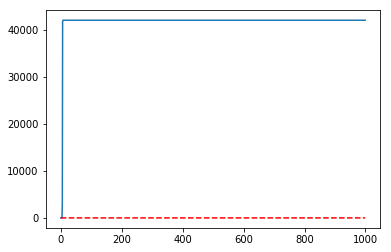

In [7]:
plt.plot(mean)
plt.plot(y[3000:], "r--")
plt.show()
plt.close()

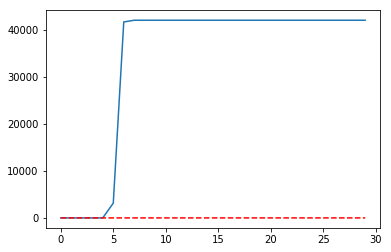

In [8]:
plt.plot(mean[:30])
plt.plot(y[3000:3030], "r--")
plt.show()
plt.close()